In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Question 1:**

Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.


Load and Explore the Dataset
Start by loading the dataset and exploring its structure.

In [34]:
# Load the data, specifying the full path within your Google Drive
temperature_data = pd.read_csv('/content/drive/MyDrive/temperature.csv')
bin_size_data = pd.read_csv('/content/drive/MyDrive/BinSize.csv')

# Load the data, specifying the full path within your Google Drive
temperature_data = pd.read_csv('/content/drive/MyDrive/temperature.csv')
bin_size_data = pd.read_csv('/content/drive/MyDrive/BinSize.csv')

# Preview the dataset
print(temperature_data.head())
print(temperature_data.info())
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])


            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB
None


**Question 3:**

Watch out for leap days (i.e., February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.


In [35]:
# Convert the Date column to datetime format and extract year and month_day
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])
temperature_data['year'] = temperature_data['Date'].dt.year
temperature_data['month_day'] = temperature_data['Date'].dt.strftime('%m-%d')

# Filter data between 2005 and 2014
filtered_data = temperature_data[(temperature_data['year'] >= 2005) & (temperature_data['year'] <= 2014)]

# Calculate TMAX and TMIN values for each day of the year (ignoring leap days)
record_highs = filtered_data[filtered_data['Element'] == 'TMAX'].groupby('month_day')['Data_Value'].max()
record_lows = filtered_data[filtered_data['Element'] == 'TMIN'].groupby('month_day')['Data_Value'].min()

# Remove February 29 (leap day)
record_highs = record_highs[record_highs.index != '02-29']
record_lows = record_lows[record_lows.index != '02-29']


**Question 1 (continued):**

Plot the record high and record low temperatures by day of the year over the period 2005-2014. Shade the area between the record high and record low temperatures.


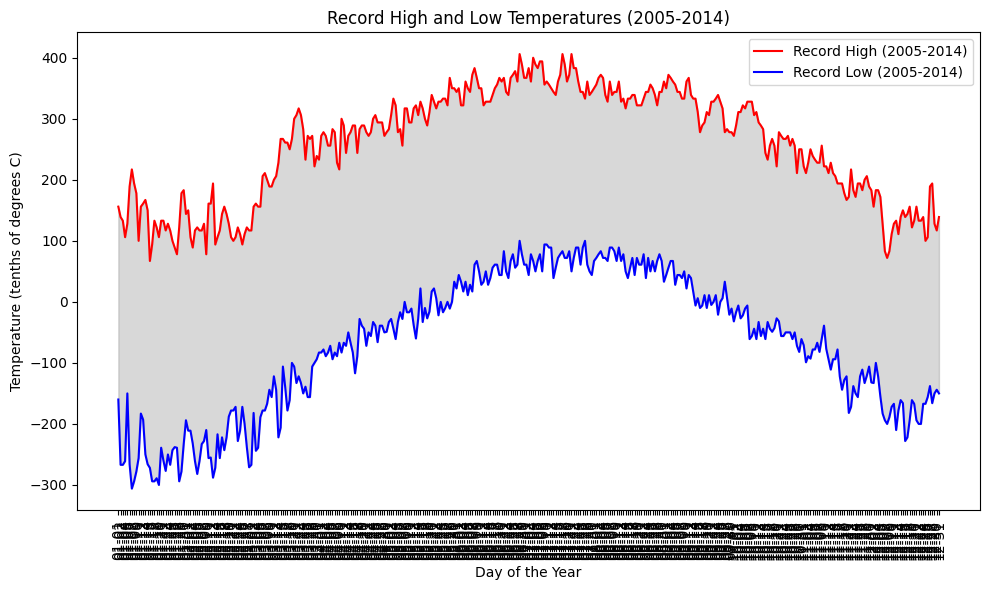

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(record_highs.index, record_highs.values, label='Record High (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Low (2005-2014)', color='blue')
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='grey', alpha=0.3)
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures (2005-2014)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Question 2:**

Overlay a scatter of the 2015 data for any points (highs and lows) where the ten-year record (2005-2014) record high or record low was broken in 2015.


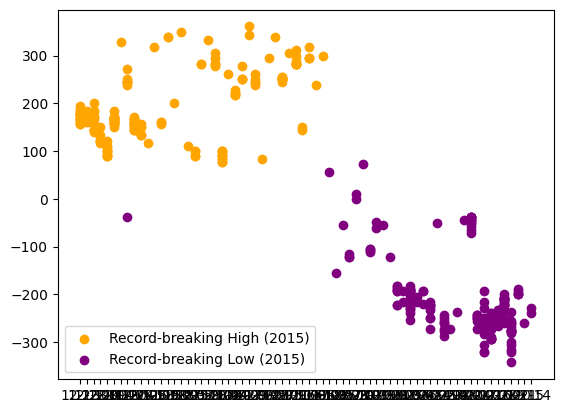

In [37]:
# Filter 2015 data
data_2015 = temperature_data[temperature_data['year'] == 2015]
data_2015 = data_2015[data_2015['month_day'] != '02-29']

# Identify record-breaking points
broken_highs = data_2015[(data_2015['Element'] == 'TMAX') & (data_2015['Data_Value'] > record_highs.loc[data_2015['month_day']].values)]
broken_lows = data_2015[(data_2015['Element'] == 'TMIN') & (data_2015['Data_Value'] < record_lows.loc[data_2015['month_day']].values)]

# Overlay scatter plot
plt.scatter(broken_highs['month_day'], broken_highs['Data_Value'], color='orange', label='Record-breaking High (2015)')
plt.scatter(broken_lows['month_day'], broken_lows['Data_Value'], color='purple', label='Record-breaking Low (2015)')
plt.legend()
plt.show()


**Question 5:**

The data you have been given is near **Ann Arbor, Michigan, United States**. Visualize on the map the stations in the data.


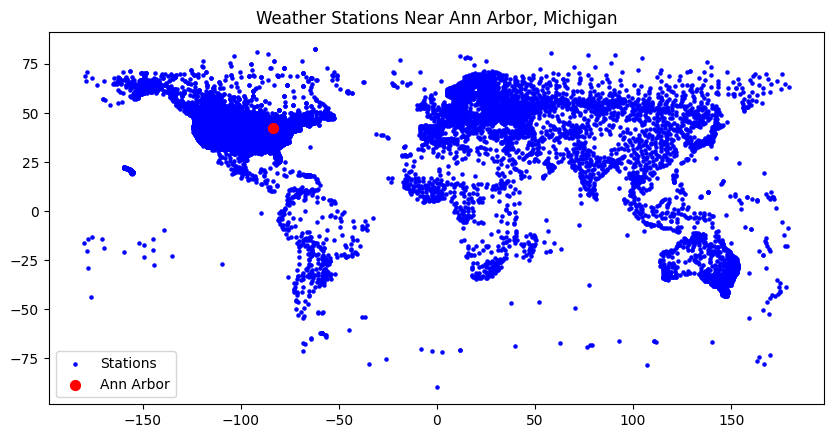

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the stations data
stations_data = pd.read_csv('/content/drive/MyDrive/BinSize.csv')

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(stations_data, geometry=gpd.points_from_xy(stations_data['LONGITUDE'], stations_data['LATITUDE']))

# Plot stations near Ann Arbor, Michigan
ann_arbor = gpd.GeoSeries(gpd.points_from_xy([-83.7430], [42.2808]), crs=gdf.crs) # Assuming gdf has a defined CRS

ax = gdf.plot(figsize=(10, 10), color='blue', markersize=5, label='Stations')
ann_arbor.plot(ax=ax, color='red', markersize=50, label='Ann Arbor')
plt.title('Weather Stations Near Ann Arbor, Michigan')
plt.legend()
plt.show()


**Question 6:**

Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

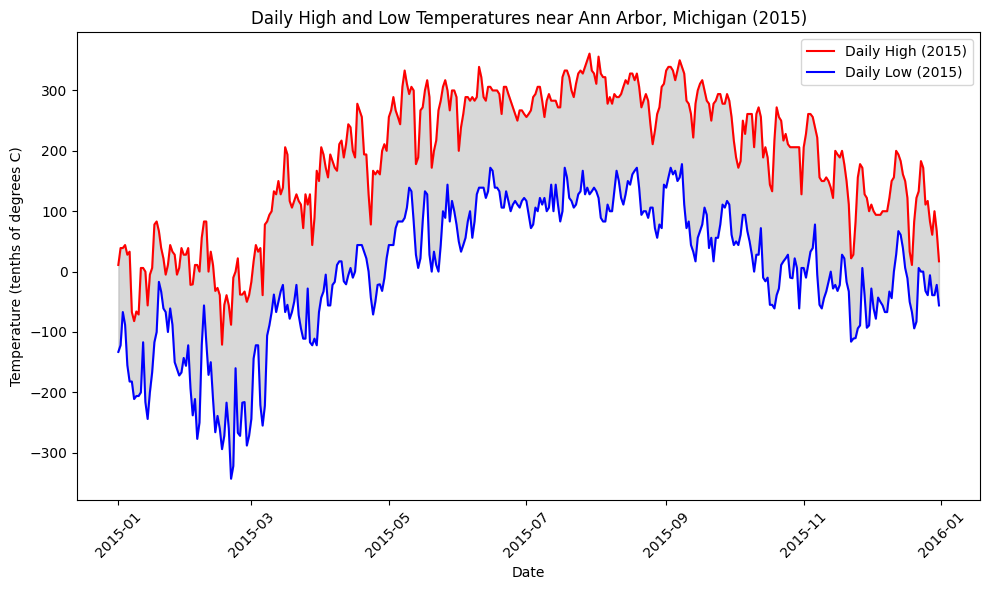

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Coordinates for Ann Arbor, Michigan
ann_arbor_coords = (-83.7430, 42.2808)

# Load the temperature and stations data
temperature_data = pd.read_csv('/content/drive/MyDrive/temperature.csv')
stations_data = pd.read_csv('/content/drive/MyDrive/BinSize.csv')

# Create GeoDataFrame for stations with latitude and longitude
gdf_stations = gpd.GeoDataFrame(stations_data,
                                geometry=gpd.points_from_xy(stations_data['LONGITUDE'], stations_data['LATITUDE']))

# Set the distance threshold (in degrees, a small value for local proximity)
distance_threshold = 1.0

# Define a function to calculate the distance from Ann Arbor
def is_near_ann_arbor(row, center_coords, threshold):
    station_coords = (row['geometry'].x, row['geometry'].y)
    return (abs(station_coords[0] - center_coords[0]) <= threshold) and \
           (abs(station_coords[1] - center_coords[1]) <= threshold)

# Filter stations near Ann Arbor
stations_near_ann_arbor = gdf_stations[gdf_stations.apply(is_near_ann_arbor,
                                                          axis=1,
                                                          center_coords=ann_arbor_coords,
                                                          threshold=distance_threshold)]

# Filter temperature data for 2015 and stations near Ann Arbor
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])
temperature_data['year'] = temperature_data['Date'].dt.year
temperature_data['month_day'] = temperature_data['Date'].dt.strftime('%m-%d')

# Filter 2015 data
temperature_data_2015 = temperature_data[temperature_data['year'] == 2015]

# Filter temperature data for nearby stations
stations_ids_near_ann_arbor = stations_near_ann_arbor['ID'].unique()
temperature_data_ann_arbor = temperature_data_2015[temperature_data_2015['ID'].isin(stations_ids_near_ann_arbor)]

# Calculate daily high and low temperatures for 2015 near Ann Arbor
daily_highs_2015 = temperature_data_ann_arbor[temperature_data_ann_arbor['Element'] == 'TMAX'].groupby('Date')['Data_Value'].max()
daily_lows_2015 = temperature_data_ann_arbor[temperature_data_ann_arbor['Element'] == 'TMIN'].groupby('Date')['Data_Value'].min()

# Plot the daily high and low temperatures near Ann Arbor, Michigan for 2015
plt.figure(figsize=(10,6))
plt.plot(daily_highs_2015.index, daily_highs_2015.values, label='Daily High (2015)', color='red')
plt.plot(daily_lows_2015.index, daily_lows_2015.values, label='Daily Low (2015)', color='blue')
plt.fill_between(daily_highs_2015.index, daily_highs_2015.values, daily_lows_2015.values, color='grey', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Daily High and Low Temperatures near Ann Arbor, Michigan (2015)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Additional Modules Explanation**

1. **Geopandas**: Used for geographical data analysis and visualization. It simplifies the process of working with spatial data and plotting geographical points.
2. **Matplotlib**: A widely-used library for creating static, animated, and interactive visualizations in Python. It allows us to create customizable plots for our temperature analysis.
